In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dython.nominal import associations

from deeprec.m1.data import load_data, preprocess, DATA_DIR, ENCODING

In [3]:
sns.set_theme(style='white')

In [4]:
MONTHS = dict(
    zip(
        range(1, 13), 
        ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
    )
)

DAYS = dict(
    zip(
        range(7),
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )
)

AGES = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+",
}

OCC = {
    0: "other",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

In [5]:
data = preprocess(load_data(), use_names=False)
data.to_parquet(DATA_DIR.joinpath('dataset.parq.gzip'), compression='gzip')

# 1. 

Load the CSV file you saved in the last milestone. Tip: Make sure that genres is still an array—parse it in case it’s not.

In [7]:
data.head()

,user,movie,rating,hour,day_of_week,month,gender,age,occupation,city,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,22,6,12,F,1,10,Royal Oak,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,21,6,12,M,56,16,Marrero,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,23,5,12,M,25,12,Winter Park,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,18,5,12,M,25,7,Charlottesville,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,6,5,12,M,50,1,Modesto,...,0,0,0,0,0,0,0,0,0,0


# 2

Explore the data, looking for trends, biases, and correlations. Specifically, find an answer to the following questions:

- What are the most and least active hours for users? How about days of the week and months?
- What are the most and least active age groups and occupations among users? What is the ratio of women to men?
- From which states and cities is most traffic coming?
- Do you spot any bias or trend in ratings? Is rating highly correlated or associated with any of the other features? (Note that some features are categorical, and so Pearson’s r cannot be used.)
- Does the average user tend to watch movies from 1990 onwards more than from the preceding years?
- What are the leading genres?

## 2.1 Activity by hour, day of week and month

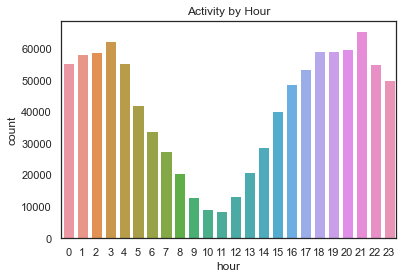

In [8]:
sns.countplot(x='hour', data=data)
plt.title('Activity by Hour')
plt.show()

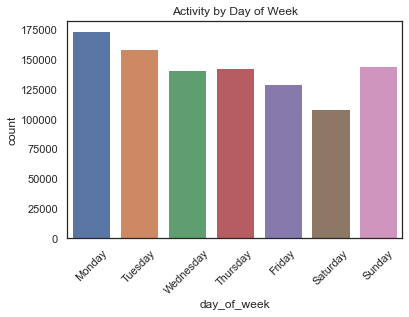

In [9]:
sns.countplot(
    x = data['day_of_week'].replace(DAYS), 
    order=DAYS.values()
)
plt.title('Activity by Day of Week')
plt.xticks(rotation = 45)
plt.show()

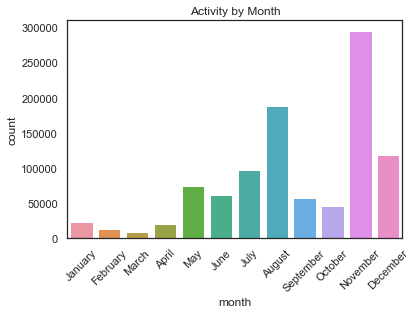

In [10]:
sns.countplot(
    x=data['month'].replace(MONTHS), 
    order=MONTHS.values()
)
plt.title('Activity by Month')
plt.xticks(rotation = 45)
plt.show()

## 2.2 Activity by age, occupation and sex

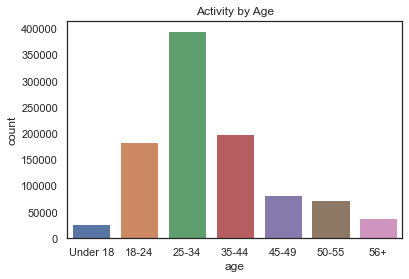

In [11]:
sns.countplot(
    x=data['age'].replace(AGES),
    order=AGES.values()
)
plt.title('Activity by Age')
plt.show()

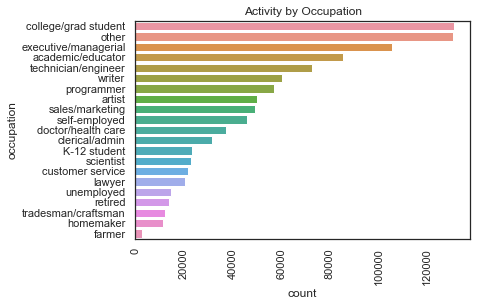

In [12]:
sns.countplot(
    y=data['occupation'].replace(OCC),
    order=[OCC[i] for i in data['occupation'].value_counts().index],
)
plt.title('Activity by Occupation')
plt.xticks(rotation = 90)
plt.show()

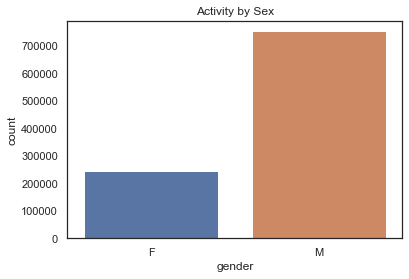

M    0.753611
F    0.246389
Name: gender, dtype: float64


In [13]:
sns.countplot(
    x=data['gender']
)
plt.title('Activity by Sex')
plt.show()
print(data['gender'].value_counts() / len(data))

## 2.3 Highest activity by states and cities

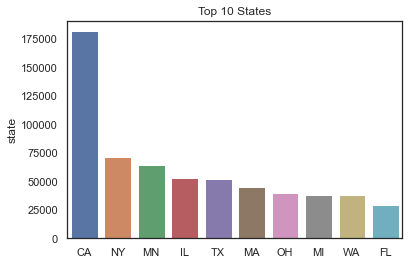

In [14]:
sns.barplot(
    x=data['state'].value_counts()[:10].index,
    y=data['state'].value_counts()[:10],
)
plt.title('Top 10 States')
plt.show()

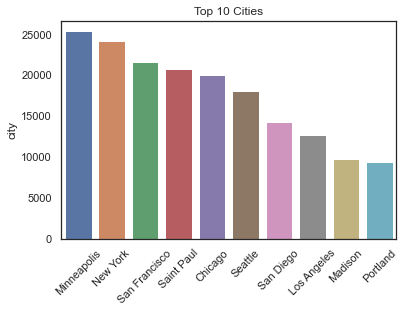

In [15]:
sns.barplot(
    x=data['city'].value_counts()[:10].index,
    y=data['city'].value_counts()[:10],
)
plt.title('Top 10 Cities')
plt.xticks(rotation = 45)
plt.show()

## 2.4 Other Correlations

In [16]:
data.columns

Index(['user', 'movie', 'rating', 'hour', 'day_of_week', 'month', 'gender',
       'age', 'occupation', 'city', 'state', 'zip', 'title', 'year', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

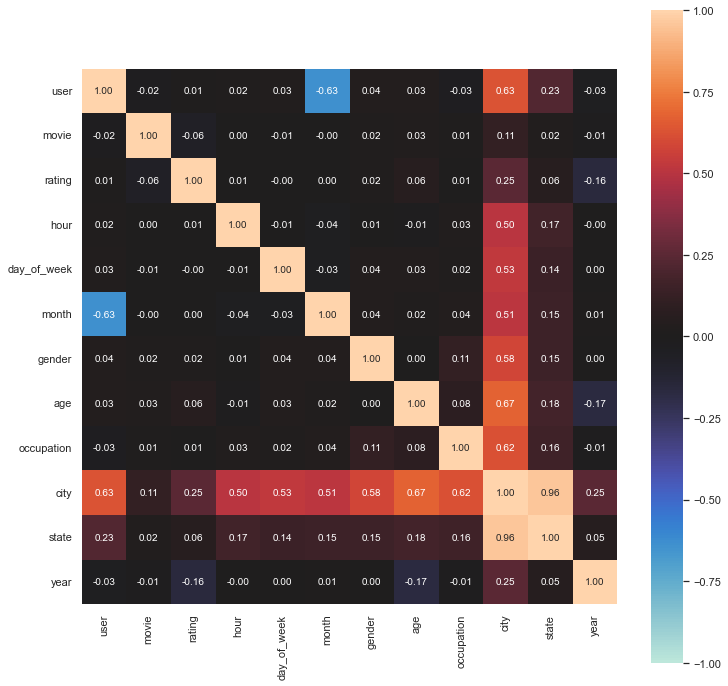

<AxesSubplot:>

In [22]:
associations(
    data.drop(['zip', 'title'], axis=1).iloc[:, :12],  # keeps all but genres
    figsize=(12,12)
)['ax']

## 2.5 Average User Movie Dates

In [18]:
data['year'].unique()

array([1975, 1996, 1964, 2000, 1998, 1987, 1959, 1983, 1937, 1939, 1991,
       1958, 1947, 1986, 1965, 1980, 1999, 1942, 1990, 1988, 1985, 1993,
       1995, 1982, 1997, 1992, 1950, 1989, 1977, 1941, 1962, 1955, 1961,
       1951, 1994, 1984, 1954, 1967, 1948, 1981, 1973, 1971, 1976, 1979,
       1940, 1960, 1978, 1969, 1974, 1972, 1933, 1966, 1957, 1968, 1963,
       1944, 1930, 1952, 1953, 1970, 1925, 1934, 1946, 1920, 1949, 1956,
       1945, 1926, 1938, 1932, 1931, 1935, 1943, 1936, 1927, 1922, 1929,
       1919, 1921, 1923, 1928])

In [19]:
ratings_by_year = data['year'].value_counts(sort=False).sort_index()
releases_by_year = data[['title', 'year']].drop_duplicates().groupby('year').size()

norm_ratings_by_year = ratings_by_year/releases_by_year

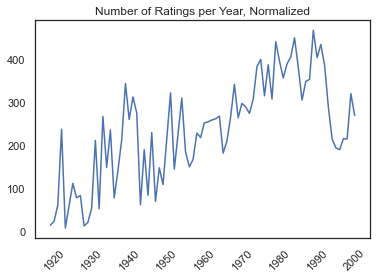

In [20]:
sns.lineplot(
    x=norm_ratings_by_year.index,
    y=norm_ratings_by_year,
)
plt.title('Number of Ratings per Year, Normalized')
plt.xticks(rotation = 45)
plt.show()

## 2.6 Leading Genres

In [60]:
genres = data.iloc[:, 14:]
genres = pd.Series(
    [x for x in ((genres == 1) * genres.columns).values.flatten().tolist() if len(x) > 0]
)

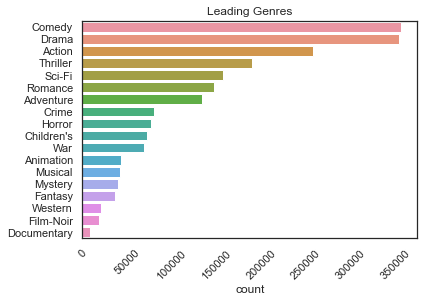

In [61]:
sns.countplot(
    y=genres,
    order=genres.value_counts().index
)
plt.title('Leading Genres')
plt.xticks(rotation = 45)
plt.show()